<a href="https://colab.research.google.com/github/architdhar/DAV/blob/main/exp03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Multiple Linear Regression in Python and R

## **Python**

In [ ]:
! pip install scikit-spatial

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from skspatial.objects import Plane, Points
from skspatial.plotting import plot_3d

In [ ]:
df = pd.read_csv("/content/Student_Performance.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [ ]:
FEATURES = ['Hours Studied', 'Previous Scores', 'Sleep Hours',
            'Sample Question Papers Practiced']
TARGET = ['Performance Index']

In [ ]:
def correlate(feature, target):
  plt.scatter(df[feature], df[target])
  plt.xlabel(feature)
  plt.ylabel(target[0])
  plt.show()

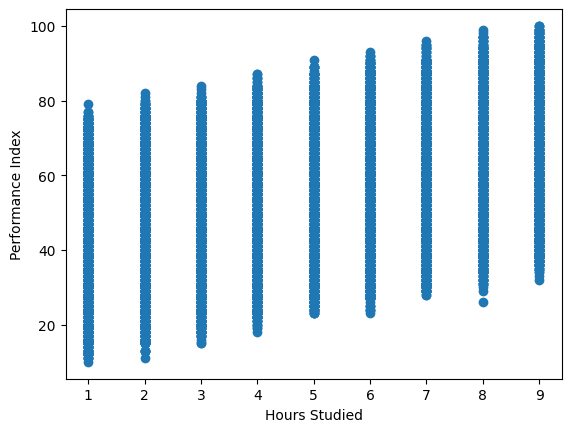

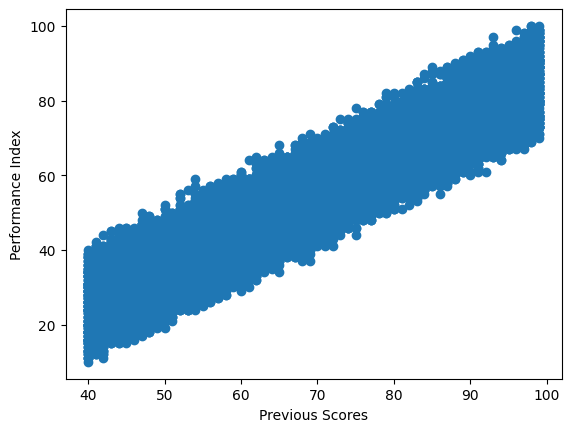

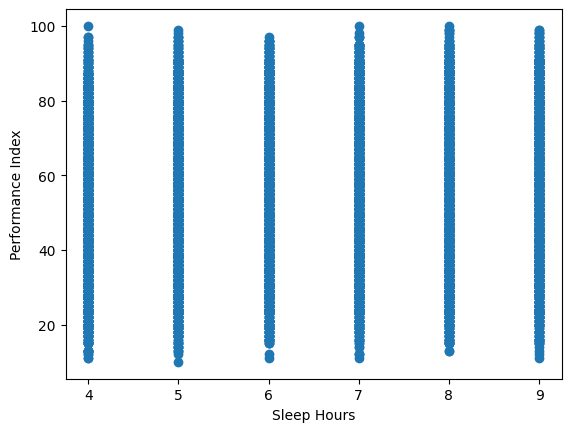

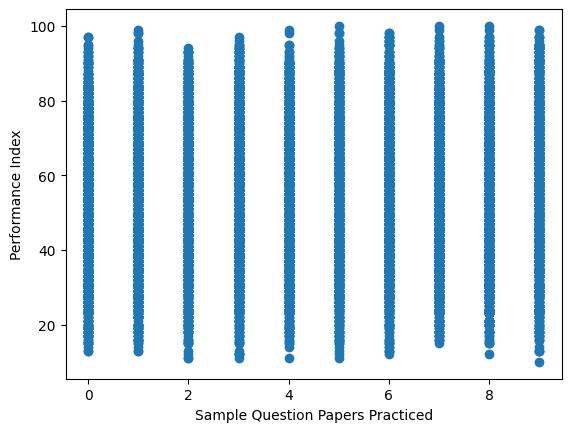

In [ ]:
for i in FEATURES:
  correlate(i, TARGET)

<ipython-input-7-e5ebaa6f359f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson', min_periods=1), annot=True)


<Axes: >

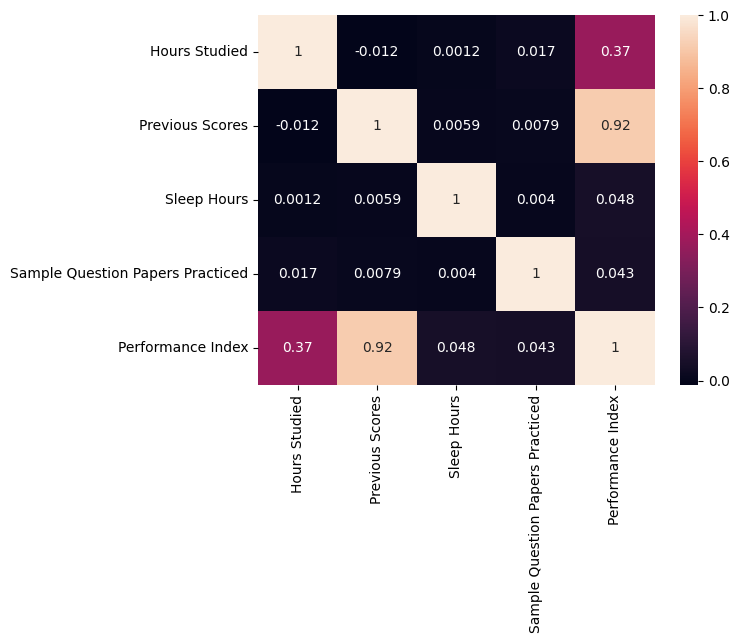

In [ ]:
sns.heatmap(df.corr(method='pearson', min_periods=1), annot=True)

In [ ]:
X_train , X_test , y_train, y_test = train_test_split(df[FEATURES], df[TARGET], test_size=0.3, random_state=48)

Model creation

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
pd.DataFrame({"x": model.coef_[0], "y": FEATURES})

,x,y
0,2.849257,Hours Studied
1,1.018072,Previous Scores
2,0.488778,Sleep Hours
3,0.195943,Sample Question Papers Practiced


In [ ]:
model.intercept_

array([-33.80210848])

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[57.15998251],
       [39.20637236],
       [50.54928931],
       ...,
       [72.29822712],
       [41.10510936],
       [75.73531437]])

In [ ]:
r2_score(y_test, y_pred)

0.9878358763474727

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

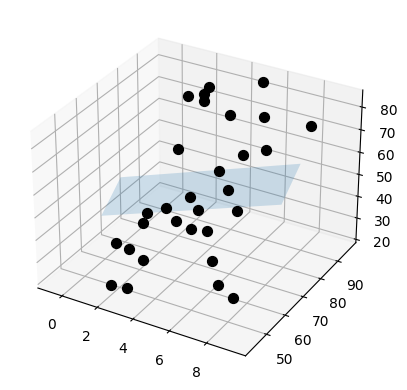

In [ ]:
points = Points([[X_test['Hours Studied'].iloc[i], X_test['Previous Scores'].iloc[i], y_pred[i][0]] for i in range(30)])
plane = Plane.best_fit(points)

plot_3d(
    points.plotter(c='k', s=50, depthshade=False),
    plane.plotter(alpha=0.2, lims_x=(-5, 5), lims_y=(-5, 5)),
)

## **R**

In [2]:
install.packages("GGally")
install.packages("ggcorrplot")
install.packages("scatterplot3d")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘patchwork’, ‘Rcpp’, ‘ggstats’, ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(GGally)
library(ggcorrplot)
library(scatterplot3d)

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [5]:
df = read.csv('/content/Student_Performance.csv')

In [6]:
summary(df)

 Hours.Studied   Previous.Scores Extracurricular.Activities  Sleep.Hours   
 Min.   :1.000   Min.   :40.00   Length:10000               Min.   :4.000  
 1st Qu.:3.000   1st Qu.:54.00   Class :character           1st Qu.:5.000  
 Median :5.000   Median :69.00   Mode  :character           Median :7.000  
 Mean   :4.993   Mean   :69.45                              Mean   :6.531  
 3rd Qu.:7.000   3rd Qu.:85.00                              3rd Qu.:8.000  
 Max.   :9.000   Max.   :99.00                              Max.   :9.000  
 Sample.Question.Papers.Practiced Performance.Index
 Min.   :0.000                    Min.   : 10.00   
 1st Qu.:2.000                    1st Qu.: 40.00   
 Median :5.000                    Median : 55.00   
 Mean   :4.583                    Mean   : 55.22   
 3rd Qu.:7.000                    3rd Qu.: 71.00   
 Max.   :9.000                    Max.   :100.00   

In [7]:
head(df)

,Hours.Studied,Previous.Scores,Extracurricular.Activities,Sleep.Hours,Sample.Question.Papers.Practiced,Performance.Index
,<int>,<int>,<chr>,<int>,<int>,<dbl>
1,7,99,Yes,9,1,91
2,4,82,No,4,2,65
3,8,51,Yes,7,2,45
4,5,52,Yes,5,2,36
5,7,75,No,8,5,66
6,3,78,No,9,6,61


In [8]:
data = df[, c("Hours.Studied", "Previous.Scores", "Sleep.Hours", "Sample.Question.Papers.Practiced", "Performance.Index")]

In [9]:
head(data)

,Hours.Studied,Previous.Scores,Sleep.Hours,Sample.Question.Papers.Practiced,Performance.Index
,<int>,<int>,<int>,<int>,<dbl>
1,7,99,9,1,91
2,4,82,4,2,65
3,8,51,7,2,45
4,5,52,5,2,36
5,7,75,8,5,66
6,3,78,9,6,61


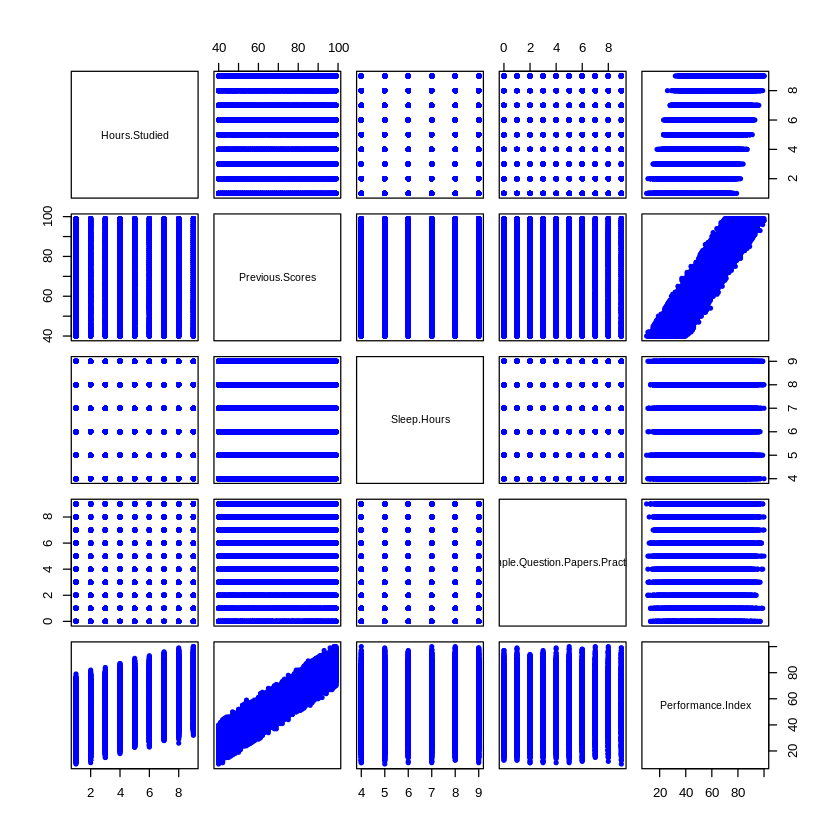

In [11]:
pairs(data, pch=20, col="blue")

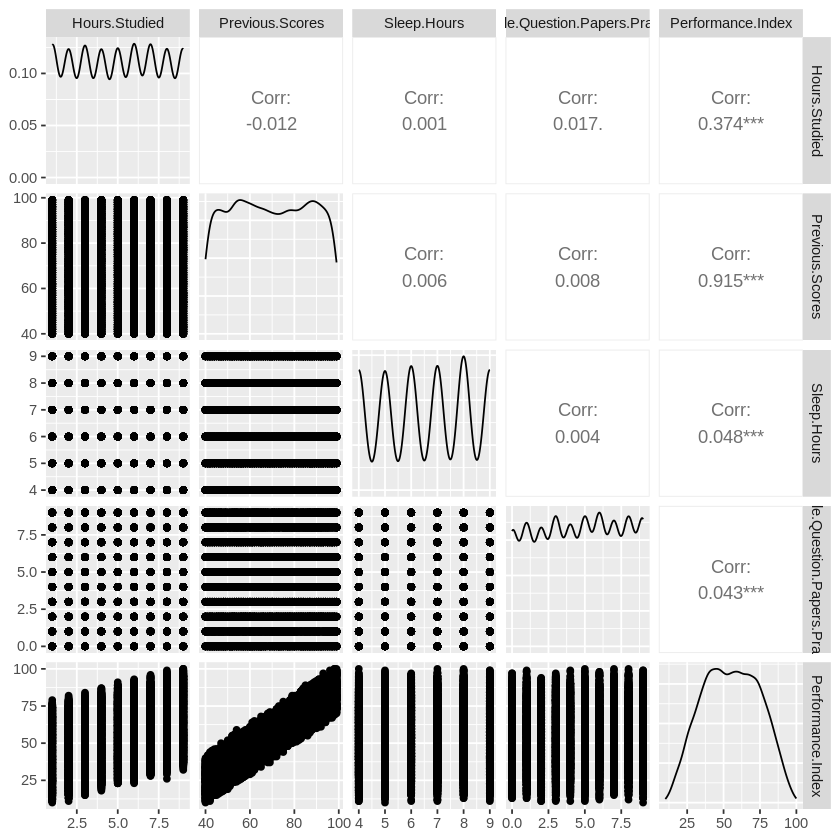

In [13]:
ggpairs(data)

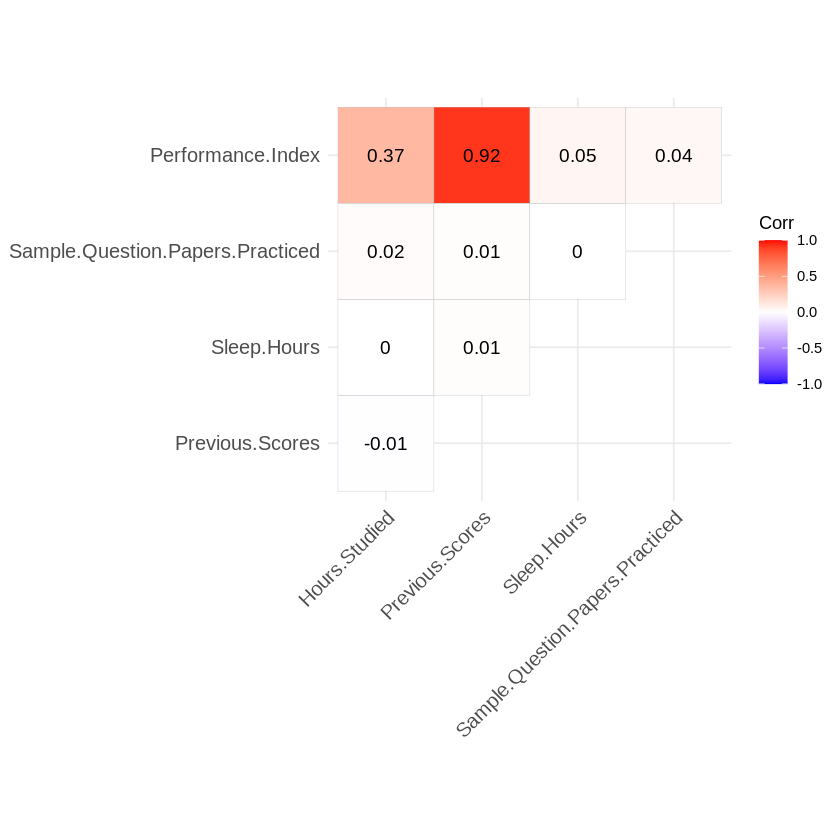

In [14]:
ggcorrplot(round(cor(data), 2), type="upper", lab=TRUE)

In [15]:
X_train <- df[, c("Hours.Studied", "Previous.Scores", "Sleep.Hours", "Sample.Question.Papers.Practiced")]
y_train <- data$Performance.Index

In [16]:
class(X_train)

[1] "data.frame"

In [17]:
model <- lm(formula=Performance.Index~Hours.Studied+Previous.Scores+Sleep.Hours+Sample.Question.Papers.Practiced, data=data)

In [18]:
summary(model)


Call:
lm(formula = Performance.Index ~ Hours.Studied + Previous.Scores + 
    Sleep.Hours + Sample.Question.Papers.Practiced, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3299 -1.3831 -0.0062  1.3701  8.4864 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -33.763726   0.126841 -266.19   <2e-16 ***
Hours.Studied                      2.853429   0.007962  358.40   <2e-16 ***
Previous.Scores                    1.018584   0.001189  857.02   <2e-16 ***
Sleep.Hours                        0.476333   0.012153   39.19   <2e-16 ***
Sample.Question.Papers.Practiced   0.195198   0.007189   27.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.061 on 9995 degrees of freedom
Multiple R-squared:  0.9885,	Adjusted R-squared:  0.9885 
F-statistic: 2.147e+05 on 4 and 9995 DF,  p-value: < 2.2e-16


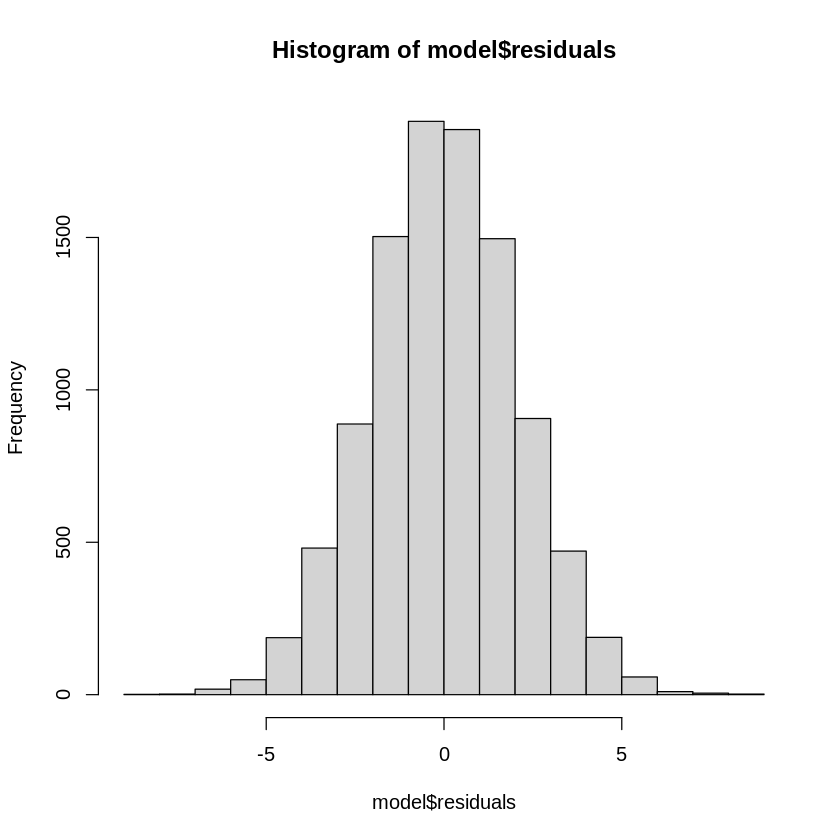

In [19]:
hist(model$residuals)

In [20]:
test = data[order(data$Hours.Studied, data$Previous.Scores),][1:100,]
h = test[, c("Hours.Studied")]
p = test[, c("Previous.Scores")]
pred = predict(model, test, type="response")

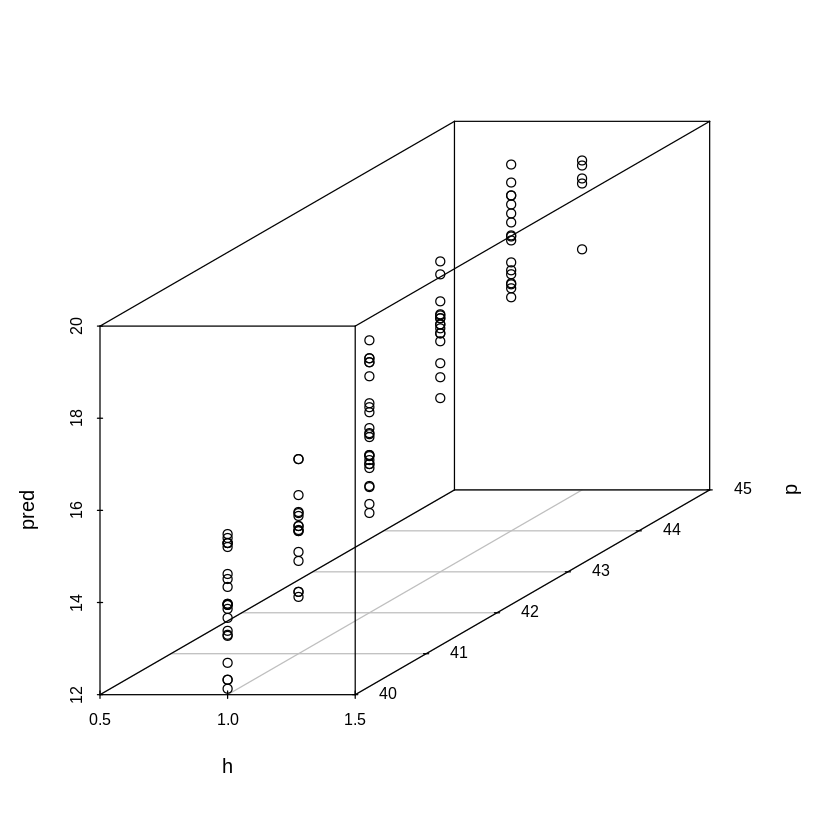

In [21]:
scatterplot3d(h, p, pred)

## **Conclusion:**

We have successfully performed Multiple Linear Regression in both Python and R